In [1]:
import re # regex
import pandas as pd # tables
import matplotlib.pyplot as plt # plots
import seaborn as sns # plots
import numpy as np # operations with arrays and matrices 

                                               Input Sentiment
0  i feel like she acts bitchy and complainy to t...     anger
1          i bet you are feeling really mad and hurt     anger
2  i knew i was going to look at the mess and fee...   sadness
3  i am just feel so shy cause i realized those p...      fear
4                       i feel accepted for who i am     trust


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


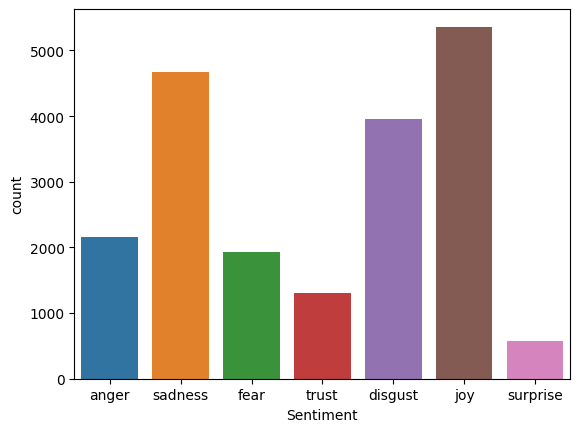

In [2]:
train = pd.read_csv('final_train.csv', encoding='utf-8')
test = pd.read_csv('final_test.csv', encoding='utf-8')
validation = pd.read_csv('final_validate.csv', encoding='utf-8')

# train = pd.read_csv('train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')

# test = pd.read_csv('test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')

# validation = pd.read_csv('val.txt',header=None,sep=';', names=['Input','Sentiment'], encoding='utf-8')

print(train.head())
sns.countplot(train, x='Sentiment')
plt.show()

In [3]:
# adding a column with encoded emotions
# emotions_to_labels = {'anger': 0, 'love': 1, 'fear': 2, 'joy': 3, 'sadness': 4,'surprise': 5}
emotions_to_labels = {'anger': 0, 'trust': 1, 'fear': 2, 'joy': 3, 'sadness': 4,'surprise': 5, 'disgust': 6}
labels_to_emotions = {j:i for i,j in emotions_to_labels.items()}

train['Labels'] = train['Sentiment'].replace(emotions_to_labels)
test['Labels'] = test['Sentiment'].replace(emotions_to_labels)
validation['Labels'] = validation['Sentiment'].replace(emotions_to_labels)

In [4]:
train.head()

,Input,Sentiment,Labels
0,i feel like she acts bitchy and complainy to t...,anger,0
1,i bet you are feeling really mad and hurt,anger,0
2,i knew i was going to look at the mess and fee...,sadness,4
3,i am just feel so shy cause i realized those p...,fear,2
4,i feel accepted for who i am,trust,1


In [5]:
def visualize_labels_distribution(df, title='the'):

  # create a pandas series with labels and their counts
  num_labels = df['Sentiment'].value_counts()

  # num of unique categories
  x_barchart = range(df['Sentiment'].nunique())
  # list of labels
  x_barchart_labels = [str(emotions_to_labels[emotion]) +\
                       ' - ' + emotion for emotion in list(num_labels.index)]

  # list of counts
  y_barchart = list(num_labels.values)

  # creating bar chart
  plt.figure(figsize = (5, 4))
  plt.bar(x_barchart, y_barchart, color='#707bfb')

  # adding num of elements for each category on plot as text
  for index, data in enumerate(y_barchart):
    plt.text(x = index, 
            y = data+max(y_barchart)/100, 
            s = '{}'.format(data), 
            fontdict = dict(fontsize=10), 
            ha = 'center',)
  
  plt.xticks(x_barchart, x_barchart_labels, rotation=40)
  plt.title('Num of elements of each category for {} dataset'.format(title))
  plt.tight_layout()

  print('There are {} records in the dataset.\n'.format(len(df.index)))

  plt.show()

There are 19950 records in the dataset.



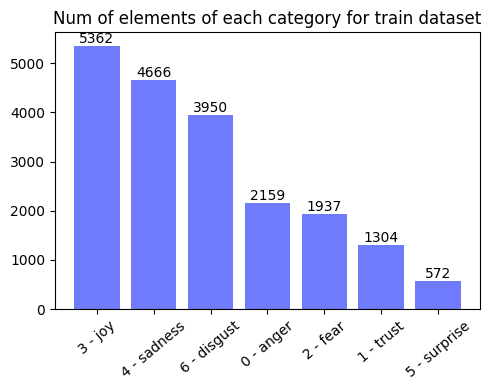

There are 3000 records in the dataset.



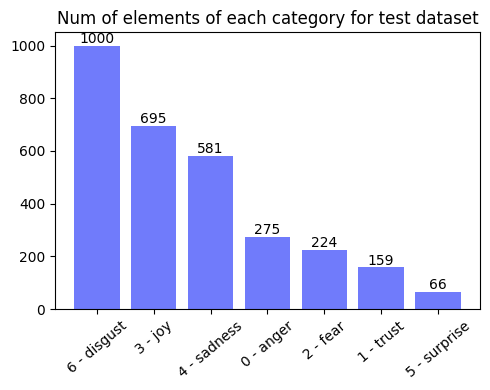

There are 3000 records in the dataset.



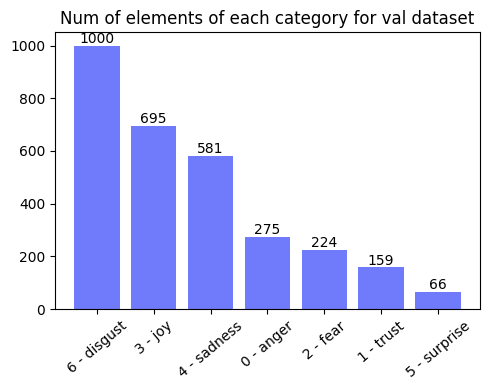

In [6]:
visualize_labels_distribution(train, 'train')
visualize_labels_distribution(test, 'test')
visualize_labels_distribution(validation, 'val')

In [7]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# downloading a set of stop-words
STOPWORDS = set(stopwords.words('english'))

# tokenizer
from nltk.tokenize import word_tokenize

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


In [8]:
def text_preprocess(text, stop_words=False):
  '''
  Accepts text (a single string) and
  a parameters of preprocessing
  Returns preprocessed text

  '''
  # clean text from non-words
  text = re.sub(r'\W+', ' ', text).lower()

  # tokenize the text
  tokens = word_tokenize(text)

  if stop_words:
    # delete stop_words
    tokens = [token for token in tokens if token not in STOPWORDS]

  return tokens

In [9]:
print('Before: ')
print(train.head())

x_train = [text_preprocess(t, stop_words=True) for t in train['Input']]
y_train = train['Labels'].values

print('\nAfter:')
for line_and_label in list(zip(x_train[:9], y_train[:9])):
  print(line_and_label)

Before: 
                                               Input Sentiment  Labels
0  i feel like she acts bitchy and complainy to t...     anger       0
1          i bet you are feeling really mad and hurt     anger       0
2  i knew i was going to look at the mess and fee...   sadness       4
3  i am just feel so shy cause i realized those p...      fear       2
4                       i feel accepted for who i am     trust       1

After:
(['feel', 'like', 'acts', 'bitchy', 'complainy', 'try', 'fit', 'doesnt', 'make', 'sense', 'part', 'bitchy', 'complainy'], 0)
(['bet', 'feeling', 'really', 'mad', 'hurt'], 0)
(['knew', 'going', 'look', 'mess', 'feel', 'guilty', 'pushing', 'get', 'taken', 'care'], 4)
(['feel', 'shy', 'cause', 'realized', 'people', 'behind', 'didnt', 'dance', 'look', 'us', 'gt'], 2)
(['feel', 'accepted'], 1)
(['almost', 'feel', 'delicate', 'heart', 'breaking'], 1)
(['feel', 'like', 'maybe', 'yoga', 'class', 'later', 'long', 'hot', 'soak', 'tub', 'beautiful', 'perfumed', 

In [10]:
x_test = [text_preprocess(t, stop_words=True) for t in test['Input']]
y_test = test['Labels'].values

x_validation = [text_preprocess(t, stop_words=True) for t in validation['Input']]
y_validation = validation['Labels'].values

In [11]:
import gensim.downloader as api
model_wiki = api.load('fasttext-wiki-news-subwords-300')

from gensim.models import Word2Vec

# train word2vec model on the corpus
model_w2v = Word2Vec(x_train + x_test + x_validation,   # data for model to train on
                 vector_size = 300,                            # embedding vector size
                 min_count = 2).wv  

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

DICT_SIZE = 15000

# creating a dictionary with most used words
# where num of words = DICT_SIZE
tokenizer = Tokenizer(num_words=DICT_SIZE)
total = x_train + x_train + x_validation
tokenizer.fit_on_texts(total)

In [13]:
# words and their indexes
list(tokenizer.word_index.items())[:5]

[('feel', 1), ('feeling', 2), ('like', 3), ('im', 4), ('really', 5)]

In [14]:
# number of unique words in the corpus
len(tokenizer.word_index)

18277

In [15]:
# find max length of sentences across all parts of the dataset
x_train_max_len = max([len(i) for i in x_train])
x_test_max_len = max([len(i) for i in x_test])
x_validation_max_len = max([len(i) for i in x_validation])

MAX_LEN = max(x_train_max_len, x_test_max_len, x_validation_max_len)

In [16]:
MAX_LEN

35

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# replace words with their indexes, 
# change size of vectors to MAX_LEN and pad indexes 
X_train = tokenizer.texts_to_sequences(x_train)
X_train_pad = pad_sequences(X_train, maxlen=MAX_LEN)

X_test = tokenizer.texts_to_sequences(x_test)
X_test_pad = pad_sequences(X_test, maxlen=MAX_LEN)

X_val = tokenizer.texts_to_sequences(x_validation)
X_val_pad = pad_sequences(X_val, maxlen=MAX_LEN)

# words are replaced by their indexes
X_train[0]

[1, 3, 1905, 615, 6777, 106, 1030, 335, 20, 187, 115, 615, 6777]

In [18]:
# sentence after padding
X_train_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1,    3, 1905,  615, 6777,  106, 1030,  335,   20,  187,  115,
        615, 6777], dtype=int32)

In [19]:
def create_weight_matrix(model, second_model=False):
  '''
  Accepts word embedding model
  and the second model, if provided
  Returns weight matrix of size m*n, where
  m - size of the dictionary
  n - size of the word embedding vector

  '''
  vector_size = model.get_vector('like').shape[0]
  w_matrix = np.zeros((DICT_SIZE, vector_size))
  skipped_words = []

  for word, index in tokenizer.word_index.items():
    if index < DICT_SIZE:
      if word in model.key_to_index: 
        w_matrix[index] = model.get_vector(word)
      else:
        if second_model:
          if word in second_model.key_to_index:
               w_matrix[index] = second_model.get_vector(word)
          else:
            skipped_words.append(word)
        else:
          skipped_words.append(word)
 
  print(f'{len(skipped_words)} words were skipped. Some of them:')
  print(skipped_words[:50])
  return w_matrix

In [20]:
weight_matrix = create_weight_matrix(model_wiki, model_w2v)

798 words were skipped. Some of them:
['okc', 'eharmony', 'headachie', 'taryns', 'arlovski', 'wantig', 'atoshealthcare', 'yiling', 'chiharu', 'odkh', 'cooeee', 'nitche', 'rebekah', 'herrman', 'coldstone', 'waaaaayyyy', 'thequeenbuzz', 'motherfuker', 'lupron', 'bernards', 'clasheen', 'keepmeinstitchez', 'misstreated', 'affeccion', 'papamoka', 'ratbagx', 'blogoversary', 'frens', 'aspieness', 'applebees', 'animesh', 'mudbloods', 'uncomfterble', 'twoyear', 'asciatic', 'swinelord', 'uberpooltoprisonpipeline', 'krupke', 'jogless', 'yhhhay', 'molyneux', 'mcslackerson', 'winterson', 'hockney', 'carcenogenic', 'mombasa', 'islamically', 'ffayths', 'wardrode', 'fullbright']


In [21]:
weight_matrix.shape

(15000, 300)

In [22]:
# import models, layers, optimizers from tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [23]:
# import and initialize early stopping
from tensorflow.keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [24]:
# initialize sequential model
model = Sequential()
model.add(Embedding(input_dim = DICT_SIZE, # the whole vocabulary size
                    output_dim = weight_matrix.shape[1], # vector space dimension
                    input_length = X_train_pad.shape[1], # max_len of text sequence
                    weights=[weight_matrix], # assign the embedding weight with embedding marix
                    trainable=False)) # set the weight to be not trainable (static)

In [25]:
model.add(Bidirectional(LSTM(128, return_sequences=True))) 
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
# Change this to based on how many outputs
model.add(Dense(6, activation = 'softmax')) 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [26]:
history = model.fit(X_train_pad, y_train, 
                    validation_data = (X_val_pad, y_validation),
                    batch_size = 8,
                    epochs = 20, 
                    callbacks = stop)

Epoch 1/20


2023-09-22 16:57:31.525281: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 6 which is outside the valid range of [0, 6).  Label values: 6 0 4 2 0 2 6 3


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/Users/maileano/Library/Python/3.11/lib/python/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/maileano/Library/Python/3.11/lib/python/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/maileano/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/Users/maileano/Library/Python/3.11/lib/python/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 604, in run_forever
      self._run_once()
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/maileano/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/Users/maileano/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/Users/maileano/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/Users/maileano/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/Users/maileano/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/Users/maileano/Library/Python/3.11/lib/python/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/maileano/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "/Users/maileano/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "/Users/maileano/Library/Python/3.11/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/maileano/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/maileano/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/maileano/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/1q/5t4p29812_n1t7551fhyzpnc0000gn/T/ipykernel_1511/4105061080.py", line 1, in <module>
      history = model.fit(X_train_pad, y_train,
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1081, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/losses.py", line 2354, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend.py", line 5762, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 6 which is outside the valid range of [0, 6).  Label values: 6 0 4 2 0 2 6 3
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_15715]

In [27]:
def plot_history(history):
    '''
    Plots training and validation accuracy and loss
    Accepts a single param - history, where
    history - keras.callbacks.History object
    Returns nothing
    
    '''
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']
    x = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, label='Training acc', color='#707bfb')
    plt.plot(x, val_accuracy, label='Validation acc', color='#fbcbff')
    plt.title('Training and validation accuracy')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, loss, label='Training loss', color='#707bfb')
    plt.plot(x, val_loss, label='Validation loss', color='#fbcbff')
    plt.title('Training and validation loss')
    plt.grid(True)
    plt.legend()

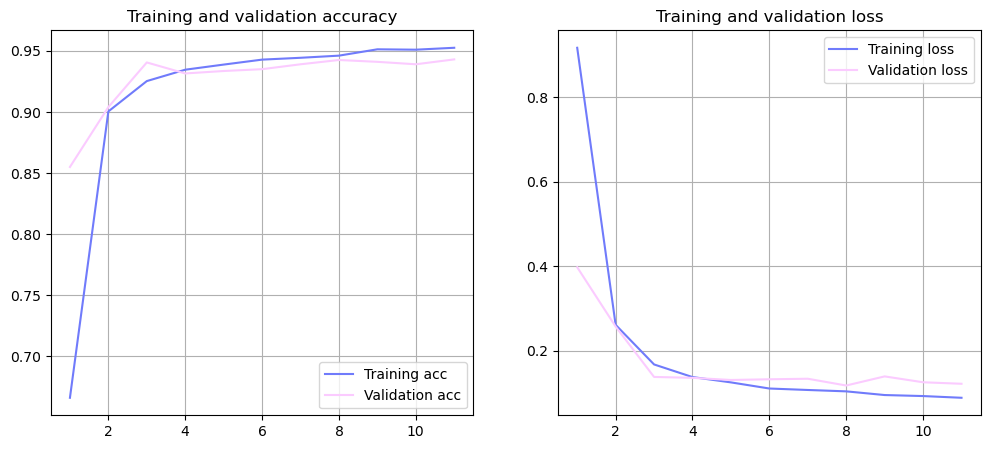

In [28]:
plot_history(history)

In [29]:
model.evaluate(X_test_pad, y_test) 
y_pred = np.argmax(model.predict(X_test_pad), axis=1)

2023-09-09 08:55:12.381689: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-09 08:55:12.382605: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-09 08:55:12.383499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

63/63 [==============================] - 4s 55ms/step - loss: 0.1550 - accuracy: 0.9305


2023-09-09 08:55:16.832416: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-09 08:55:16.833569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-09 08:55:16.834437: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

63/63 [==============================] - 4s 56ms/step


In [30]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       275
           1       0.85      0.81      0.83       159
           2       0.97      0.83      0.90       224
           3       0.94      0.96      0.95       695
           4       0.97      0.97      0.97       581
           5       0.69      0.91      0.78        66

    accuracy                           0.93      2000
   macro avg       0.89      0.90      0.89      2000
weighted avg       0.93      0.93      0.93      2000



In [31]:
# setting a custom colormap
from matplotlib.colors import LinearSegmentedColormap
colors = ['#ffffff', '#fbcbff', '#707bfb']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)

In [32]:
def plot_confusion_matrix(matrix, fmt=''):
  '''
  Accepts a confusion matrix and a format param
  Plots the matrix as a heatmap
  Returns nothing

  '''
  plt.figure(figsize=(9, 8))
  sns.heatmap(matrix, annot=True, 
              cmap=cmap, 
              fmt=fmt, 
              xticklabels=emotions_to_labels.keys(), 
              yticklabels=emotions_to_labels.keys())
  plt.ylabel('True labels')
  plt.xlabel('Predicted labels')
  plt.show()

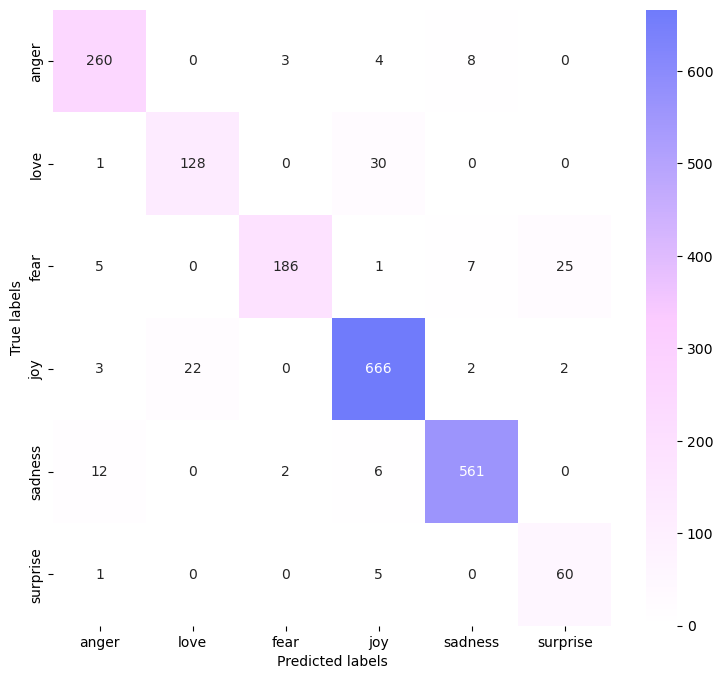

In [33]:
matrix = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(matrix)

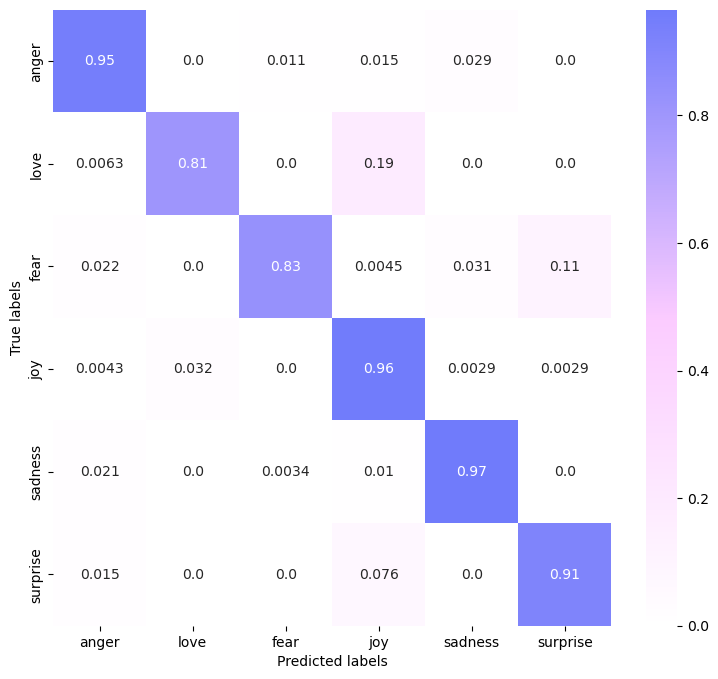

In [34]:
# create new confusion matrix
# where values are normed by row
matrix_new = np.zeros(matrix.shape)

for row in range(len(matrix)):
  sum = np.sum(matrix[row])
  for element in range(len(matrix[row])):
    matrix_new[row][element] = matrix[row][element] / sum

plot_confusion_matrix(matrix_new, fmt='.2')

In [35]:
def predict(texts):
  '''
  Accepts array if texts (strings)
  Prints sentence and the corresponding label (emotion)
  Returns nothing
  
  '''
  texts_prepr = [text_preprocess(t) for t in texts]
  sequences = tokenizer.texts_to_sequences(texts_prepr)
  pad = pad_sequences(sequences, maxlen=MAX_LEN)

  predictions = model.predict(pad)
  labels = np.argmax(predictions, axis=1)
  
  for i, lbl in enumerate(labels):
    print(f'\'{texts[i]}\' --> {labels_to_emotions[lbl]}')

In [41]:
test_texts = ['disgust']

predict(test_texts)

1/1 [==============================] - 0s 19ms/step
'disgust' --> anger
